<a href="https://colab.research.google.com/github/fahad3345/price-prediction-LSTM/blob/main/Next_word_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
#Step 2: Load your file
from google.colab import files
uploaded = files.upload()

Saving book.txt to book.txt


### Step 3: Open and pre-process the data

In [8]:
#Step 3: Open and pre-process the data
file = open("book.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:700]

'The Project Gutenberg eBook of The Answering Voice This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: The Answering VoiceOne Hundred Love Lyrics by Women Compiler: Sara Teasdale Release date: August 4, 2023 [eBook #71343] Language: English Original publication: Boston: Houghton Mifflin, 1917 Credits:'

In [9]:
len(data)

93464

### Step 4: Implement tokenization and make additional adjustments

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 23, 54, 186, 5, 1, 351, 258, 29, 186, 16, 11, 1, 147, 5]

In [12]:
len(sequence_data)

17348

In [13]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

3076


In [14]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17345


array([[  1,  23,  54, 186],
       [ 23,  54, 186,   5],
       [ 54, 186,   5,   1],
       [186,   5,   1, 351],
       [  5,   1, 351, 258],
       [  1, 351, 258,  29],
       [351, 258,  29, 186],
       [258,  29, 186,  16],
       [ 29, 186,  16,  11],
       [186,  16,  11,   1]])

In [15]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  1  23  54]
 [ 23  54 186]
 [ 54 186   5]
 [186   5   1]
 [  5   1 351]
 [  1 351 258]
 [351 258  29]
 [258  29 186]
 [ 29 186  16]
 [186  16  11]]
Response:  [186   5   1 351 258  29 186  16  11   1]


In [16]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Step 5: Creating the model

In [17]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             30760     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 3076)              3079076   
                                                                 
Total params: 16,158,836
Trainable params: 16,158,836
Non-trainable params: 0
_________________________________________________________________


### Step 6: Plot the model

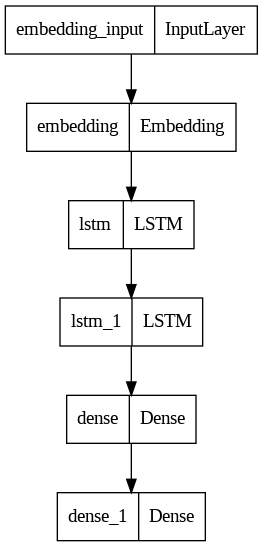

In [18]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

### Step 7: Train the model

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
272/272 [==============================] - ETA: 0s - loss: 6.8605
Epoch 1: loss improved from inf to 6.86047, saving model to next_words.h5
272/272 [==============================] - 21s 41ms/step - loss: 6.8605
Epoch 2/70
271/272 [============================>.] - ETA: 0s - loss: 6.4524
Epoch 2: loss improved from 6.86047 to 6.45238, saving model to next_words.h5
272/272 [==============================] - 5s 20ms/step - loss: 6.4524
Epoch 3/70
271/272 [============================>.] - ETA: 0s - loss: 6.2165
Epoch 3: loss improved from 6.45238 to 6.21651, saving model to next_words.h5
272/272 [==============================] - 4s 15ms/step - loss: 6.2165
Epoch 4/70
269/272 [============================>.] - ETA: 0s - loss: 5.9296
Epoch 4: loss improved from 6.21651 to 5.93030, saving model to next_words.h5
272/272 [==============================] - 4s 15ms/step - loss: 5.9303
Epoch 5/70
271/272 [============================>.] - ETA: 0s - loss: 5.6615
Epoch 5: loss improved

### Step 8: Let’s predict

In [20]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [21]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: literature, the work of women has
['of', 'women', 'has']
1/1 [==============================] - 1s 658ms/step
compared
Enter your line: i'm going to 
['going', 'to', '']
1/1 [==============================] - 1s 648ms/step
the
Enter your line: 0
Execution completed.....
